In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("PM_MF_Q_middle_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        40.2961 (33.7250, 45.3067) (33.9707, 45.4905) 11.5199 (Jnode 202)\n',
 't_n104        32.2690 (26.5450, 37.2932) (26.6998, 37.4352) 10.7354 (Jnode 201)\n',
 't_n105        31.3578 (25.7862, 36.2617) (25.9347, 36.4012) 10.4664 (Jnode 200)\n',
 't_n106        28.8268 (23.6827, 33.3615) (23.7161, 33.3870)  9.6709 (Jnode 199)\n',
 't_n107        28.2383 (23.1965, 32.7080) (23.1567, 32.6626)  9.5059 (Jnode 198)\n',
 't_n108        26.8822 (22.0626, 31.1624) (22.1030, 31.2010)  9.0980 (Jnode 197)\n',
 't_n109        15.5828 (12.6531, 18.2814) (12.6813, 18.3067)  5.6255 (Jnode 196)\n',
 't_n110        15.3476 (12.4606, 18.0107) (12.4745, 18.0195)  5.5450 (Jnode 195)\n',
 't_n111        14.9215 (12.1154, 17.5155) (12.1003, 17.4991)  5.3988 (Jnode 194)\n',
 't_n112        14.2609 (11.5700, 16.7552) (11.5599, 16.7427)  5.1827 (Jnode 193)\n',
 't_n113        13.8331 (11.2185, 16.2612) (11.1830, 16.2219)  5.0388 (Jnode 192)\n',
 't_n114         9.9867 ( 8.0780, 11.8754) ( 8.0334, 1

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[40.2961,
 32.269,
 31.3578,
 28.8268,
 28.2383,
 26.8822,
 15.5828,
 15.3476,
 14.9215,
 14.2609,
 13.8331,
 9.9867,
 2.1208,
 7.0064,
 4.9388,
 10.7271,
 9.0779,
 14.1421,
 13.4323,
 7.0376,
 10.5847,
 8.8514,
 9.3883,
 13.3282,
 12.5822,
 4.1801,
 14.4075,
 13.2067,
 8.849,
 7.4762,
 6.0269,
 10.4683,
 8.6193,
 5.4912,
 24.529,
 20.8346,
 26.4636,
 23.955,
 22.315,
 18.8624,
 16.2422,
 14.279,
 11.9256,
 18.7367,
 11.1078,
 22.7706,
 20.4658,
 5.7265,
 2.8763,
 28.8543,
 26.0231,
 22.834,
 18.1434,
 17.9976,
 26.7194,
 24.1306,
 24.5057,
 30.912,
 29.2108,
 25.5491,
 12.0029,
 26.1717,
 24.0746,
 20.7645,
 17.9516,
 15.911,
 26.1593,
 19.6685,
 18.8654,
 18.2604,
 18.0558,
 16.3462,
 15.7292,
 15.3484,
 14.4674,
 13.323,
 12.1306,
 10.5383,
 7.4854,
 13.2897,
 12.1039,
 10.8587,
 14.1703,
 12.7319,
 12.0725,
 9.8511,
 10.7979,
 12.9636,
 11.6293,
 9.5772,
 15.4407,
 13.5901,
 14.7797,
 13.7759,
 12.5288,
 9.267,
 9.0147,
 5.7294,
 2.1593,
 18.0642,
 15.4366]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_G4_C60_middle_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[42.0402,
 38.2722,
 37.2721,
 33.6062,
 32.7762,
 30.8785,
 18.0276,
 17.8981,
 17.5181,
 17.0262,
 16.279,
 12.1621,
 3.6367,
 9.189,
 7.557,
 12.8267,
 10.7855,
 16.8271,
 16.2016,
 9.4353,
 13.0126,
 10.8627,
 11.4285,
 15.8383,
 14.8839,
 4.1057,
 17.1827,
 15.599,
 11.2886,
 10.4869,
 8.8917,
 12.2714,
 9.8078,
 8.6403,
 29.6685,
 23.0583,
 31.2794,
 28.4637,
 26.53,
 20.6819,
 17.9946,
 15.9548,
 13.4888,
 21.9391,
 11.608,
 26.0959,
 23.9356,
 6.0314,
 2.7098,
 35.186,
 31.3341,
 25.6628,
 19.9394,
 21.4529,
 33.0144,
 28.6432,
 29.7883,
 37.0866,
 31.5822,
 34.7696,
 31.343,
 10.7571,
 31.4045,
 29.8229,
 25.1937,
 16.8715,
 22.3581,
 19.3179,
 18.6215,
 18.2393,
 17.3572,
 15.7738,
 15.1785,
 14.622,
 13.8253,
 12.7683,
 11.788,
 10.187,
 7.0834,
 13.0209,
 11.5887,
 10.3173,
 14.038,
 12.7876,
 12.065,
 9.6649,
 10.8913,
 12.5772,
 11.0053,
 9.2848,
 15.0888,
 13.3378,
 14.4365,
 13.7344,
 12.2208,
 9.2082,
 8.6747,
 7.11,
 2.4471,
 18.8168,
 15.8764]

In [12]:
posterior_mean_iqtree

[40.2961,
 32.269,
 31.3578,
 28.8268,
 28.2383,
 26.8822,
 15.5828,
 15.3476,
 14.9215,
 14.2609,
 13.8331,
 9.9867,
 2.1208,
 7.0064,
 4.9388,
 10.7271,
 9.0779,
 14.1421,
 13.4323,
 7.0376,
 10.5847,
 8.8514,
 9.3883,
 13.3282,
 12.5822,
 4.1801,
 14.4075,
 13.2067,
 8.849,
 7.4762,
 6.0269,
 10.4683,
 8.6193,
 5.4912,
 24.529,
 20.8346,
 26.4636,
 23.955,
 22.315,
 18.8624,
 16.2422,
 14.279,
 11.9256,
 18.7367,
 11.1078,
 22.7706,
 20.4658,
 5.7265,
 2.8763,
 28.8543,
 26.0231,
 22.834,
 18.1434,
 17.9976,
 26.7194,
 24.1306,
 24.5057,
 30.912,
 29.2108,
 25.5491,
 12.0029,
 26.1717,
 24.0746,
 20.7645,
 17.9516,
 15.911,
 26.1593,
 19.6685,
 18.8654,
 18.2604,
 18.0558,
 16.3462,
 15.7292,
 15.3484,
 14.4674,
 13.323,
 12.1306,
 10.5383,
 7.4854,
 13.2897,
 12.1039,
 10.8587,
 14.1703,
 12.7319,
 12.0725,
 9.8511,
 10.7979,
 12.9636,
 11.6293,
 9.5772,
 15.4407,
 13.5901,
 14.7797,
 13.7759,
 12.5288,
 9.267,
 9.0147,
 5.7294,
 2.1593,
 18.0642,
 15.4366]

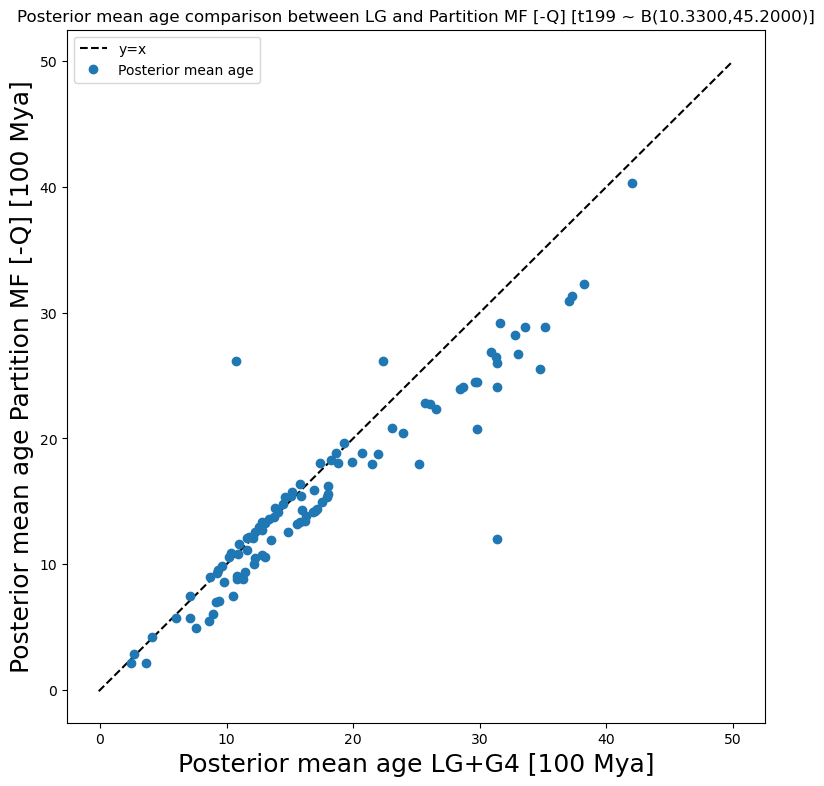

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age Partition MF [-Q] [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and Partition MF [-Q] [t199 ~ B(10.3300,45.2000)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_partition_MF_Q_middle_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')